# K-Means clustering with Iris-dataset

## Link to original dataset
https://archive.ics.uci.edu/ml/datasets/iris

### Load the data

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset
iris = load_iris()

In [3]:
# create DataFrame
df = pd.DataFrame(iris.data, columns=['P Length', 'P Width', 'S Length', 'S Width'])

In [4]:
# preview the df
df.head()

,P Length,P Width,S Length,S Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scaling the data for better results
- Usually always recommended with machine learning models

In [5]:
ss = StandardScaler() # common scaler.. other option might be MinMaxScaler
df_scaled = pd.DataFrame(ss.fit_transform(df),
                         columns = df.columns,
                         index = df.index) # give columns and index separately because they are lost in the scaling process

### create and fit model

- Number of clusters is known to be 3 with this dataset so I'll just use that. 
- If the number of clusters is not known google for: elbow method, silhouette score

In [6]:
# create model
km = KMeans(n_clusters = 3, random_state = 42) # random_state is used as a seed to make result reproducible

# fit the model to your data
km.fit(df_scaled) 

# get predicted labels (same as later km.labels_)
y_km = km.fit_predict(df_scaled) 

In [13]:
# make a copy of original dataframe – I don't want my changes to affect the original dataframe since I'll use it later
df2 = df_scaled.copy()

# give labels to specimen
df2['K-Means label'] = km.labels_ #get the model generated labels out from labels_ -attribute

### view the data

In [8]:
# groupby requires aggregate function (here I use mean) to be used with it
round(df2.groupby('K-Means label').mean(), 2) #round makes the numbers more readable

,P Length,P Width,S Length,S Width
K-Means label,,,,
0,1.14,0.09,1.00,1.02
1,-1.01,0.85,-1.30,-1.25
2,-0.05,-0.88,0.35,0.28


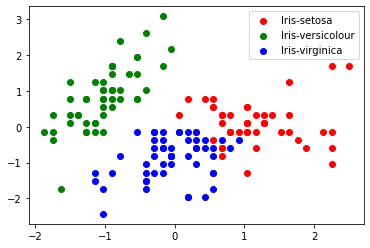

In [14]:
# plot scaled data with clustering
# here I "slice" the data with a mask/filter
# first scatter plot is made by using the cluster-label == 0
# second with cluster-label == 1 
# etc

plt.scatter(df_scaled[y_km == 0].iloc[:,0], df_scaled[y_km == 0].iloc[:,1], c = 'red', label = 'Iris-setosa')
plt.scatter(df_scaled[y_km == 1].iloc[:,0], df_scaled[y_km == 1].iloc[:,1], c = 'green', label = 'Iris-versicolour')
plt.scatter(df_scaled[y_km == 2].iloc[:,0], df_scaled[y_km == 2].iloc[:,1], c = 'blue', label = 'Iris-virginica')
plt.legend() #makes the labels visible in the plot
plt.show()

### Comparing

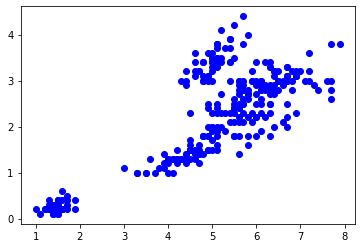

In [10]:
# plot original data
plt.scatter(df.iloc[:,0], df.iloc[:,1], c="blue") # P length, P Width
plt.scatter(df.iloc[:,2], df.iloc[:,3], c="blue") # S Length, S Width
plt.show()

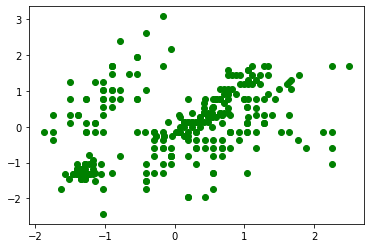

In [11]:
# plot scaled data without clustering
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1], c="green") # P length, P Width
plt.scatter(df_scaled.iloc[:,2], df_scaled.iloc[:,3], c="green") # S Length, S Width
plt.show()